# Data pre-processing - Understand the data and treat missing values (Use box plot), outliers (5 points)

In [98]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore

# Read the dataset

mpg_df = pd.read_csv("vehicle.csv")  


cleanup_nums = {"class":     {"bus": 0, "car": 1,"van":2}}
mpg_df.replace(cleanup_nums, inplace=True)
mpg_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2  
2             188.0            196      1  
3             199.0            207      2  
4             180.0            183      0

In [99]:
mpg_df = mpg_df.replace('?', np.nan)
mpg_df = mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)

In [100]:
mpg_df.shape

(846, 19)

In [101]:
# Split the wine data into separate training (70%) and test (30%) sets and then standardize it to unit variance:

# Define features
X = mpg_df.iloc[:,0:18]

# Define categorical outcome 
y = mpg_df.iloc[:,18]


# Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (5 points)

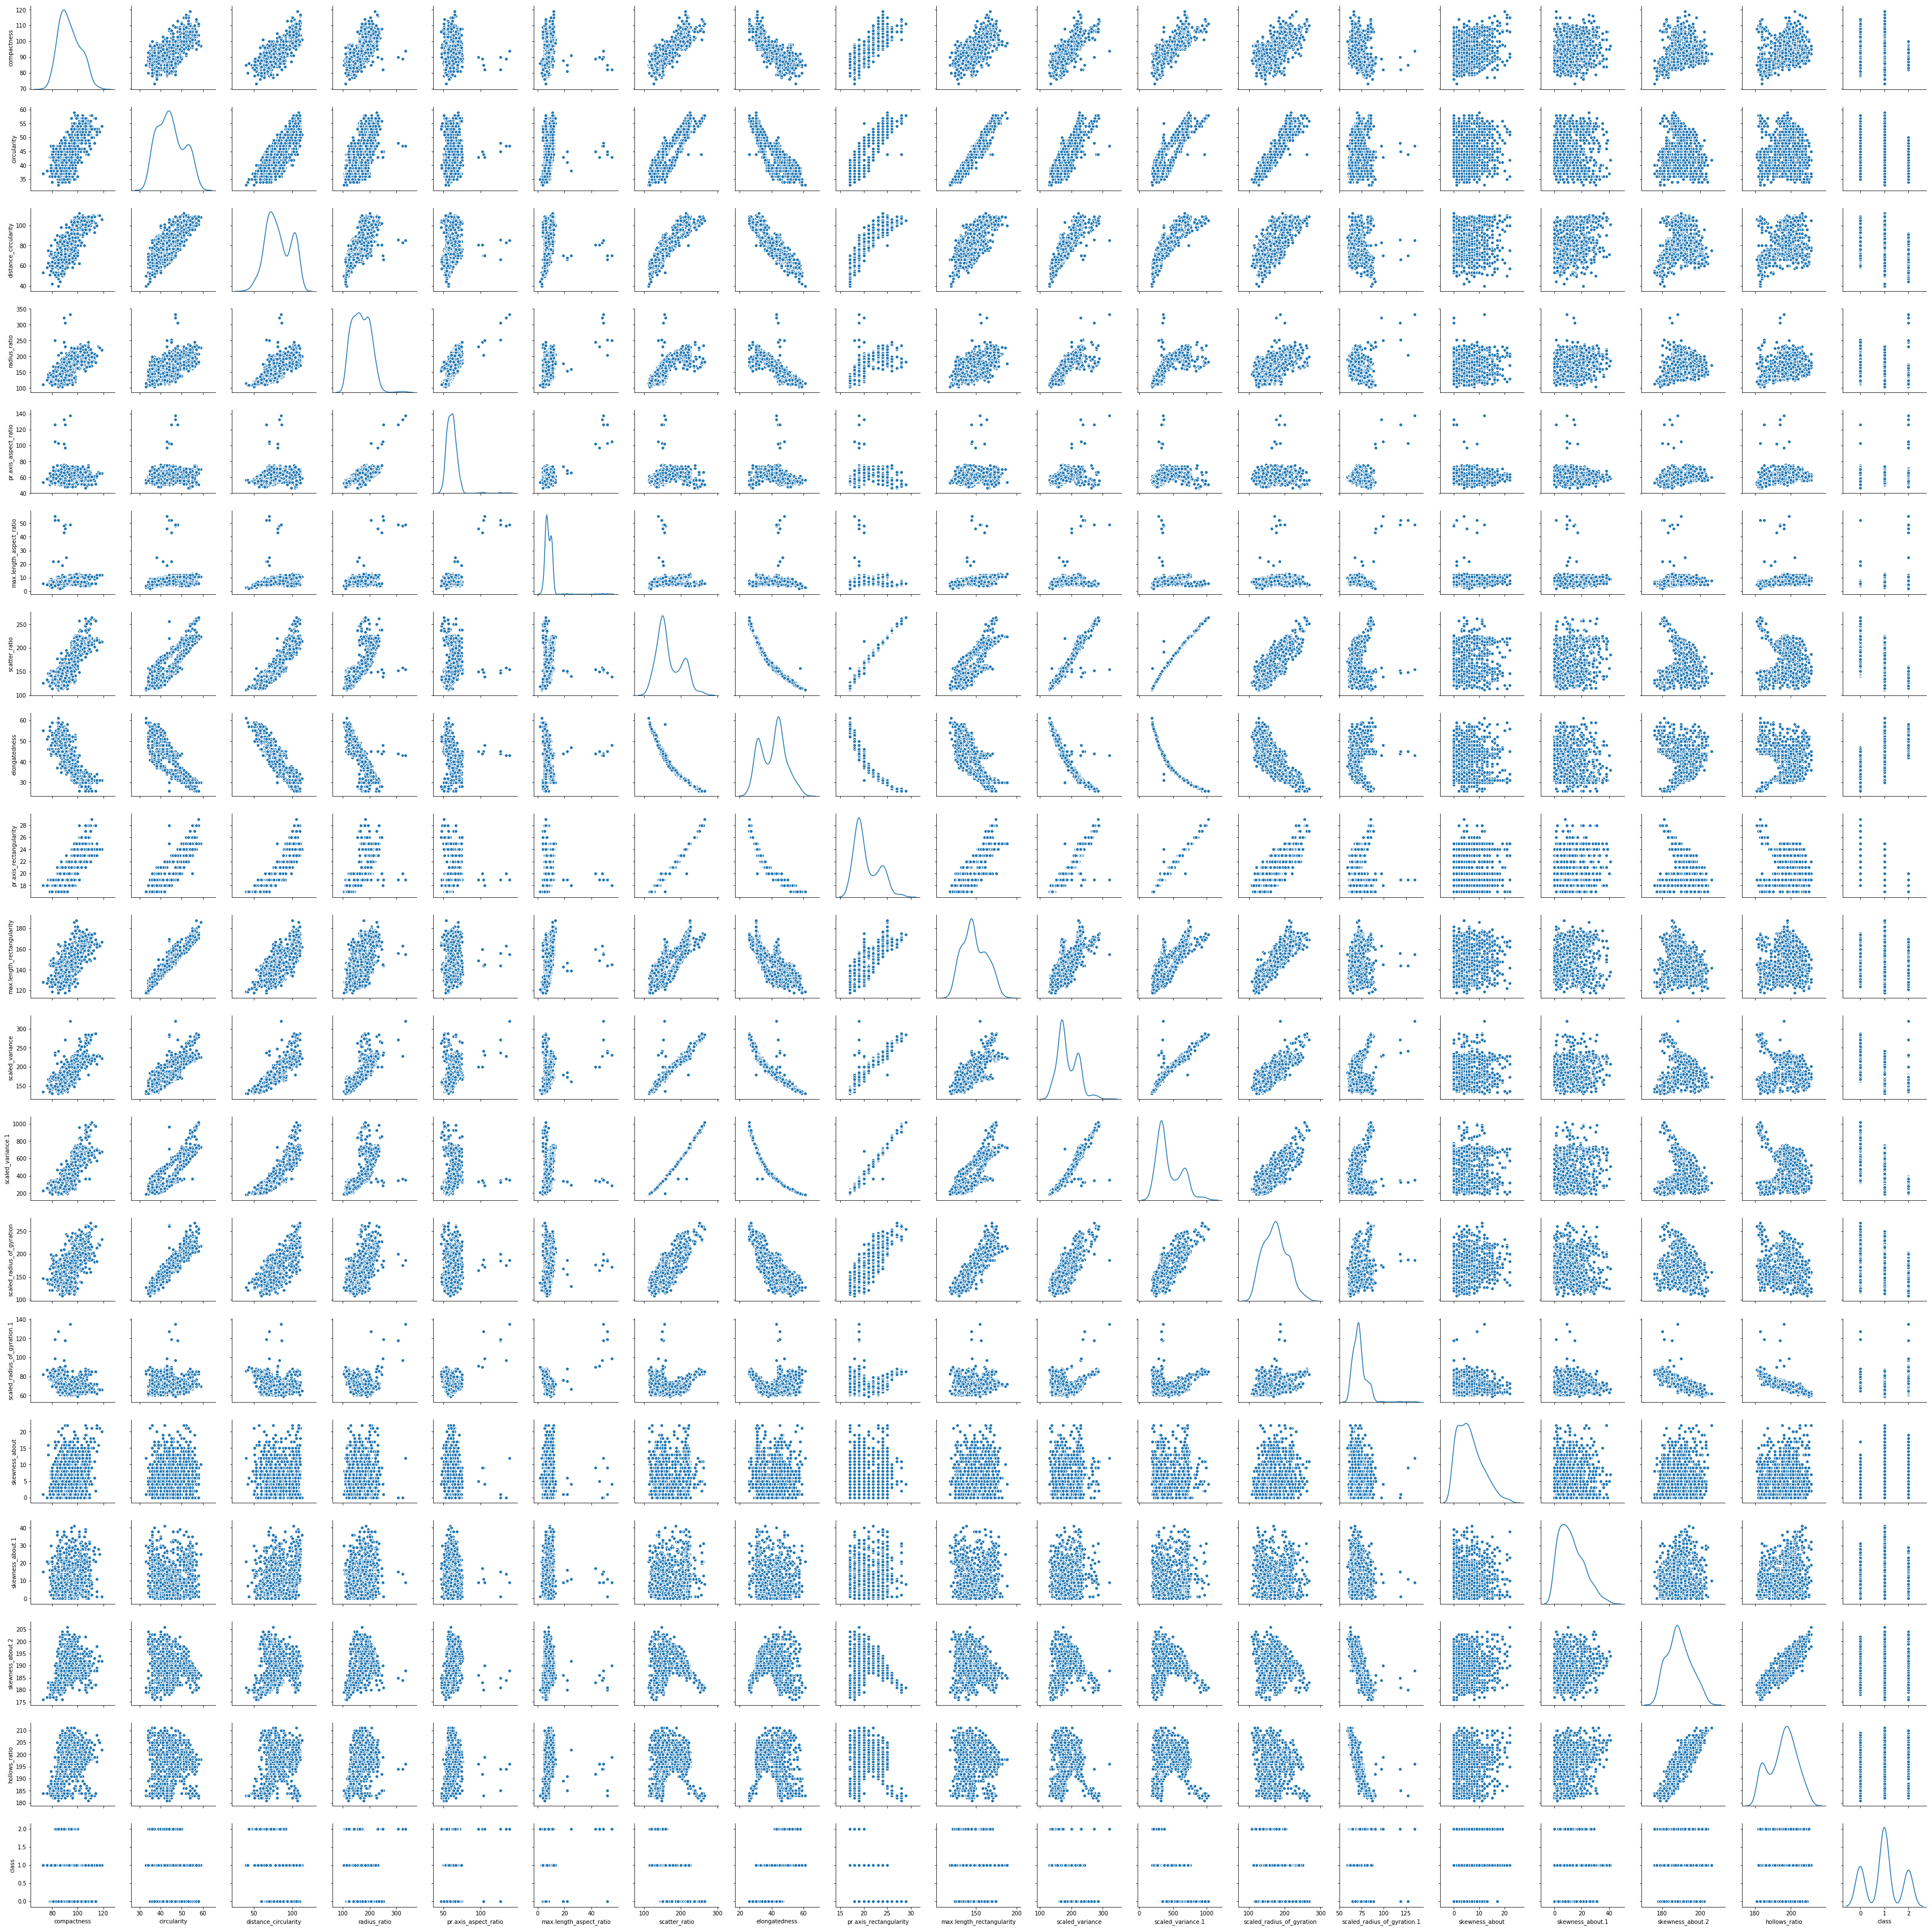

In [37]:
#Visually inspect the covariance between independent dimensions and between mpg and independent dimensions

sns.pairplot(mpg_df, diag_kind='kde') 

In [103]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)


Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.1038547

C:\Users\Sahanaa_M\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sahanaa_M\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [104]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.75283688e-01  1.26953763e-01 -1.19922479e-01  7.83843562e-02
   6.95178336e-02 -1.44875476e-01 -4.51862331e-01 -5.66136785e-01
  -4.84418105e-01 -2.60076393e-01  4.65342885e-02 -1.20344026e-02
  -1.56136836e-01 -1.00728764e-02 -6.00532537e-03  6.00485194e-02
  -6.50956666e-02 -9.67780251e-03]
 [ 2.93258469e-01 -1.25576727e-01 -2.48205467e-02  1.87337408e-01
  -8.50649539e-02  3.02731148e-01  2.49103387e-01 -1.79851809e-01
  -1.41569001e-02  9.80779086e-02  3.01323693e-03  2.13635088e-01
  -1.50116709e-02 -9.15939674e-03  7.38059396e-02 -4.26993118e-01
  -2.61244802e-01 -5.97862837e-01]
 [ 3.04609128e-01  7.29516436e-02 -5.60143254e-02 -7.12008427e-02
   4.06645651e-02  1.38405773e-01 -7.40350569e-02  4.34748988e-01
  -1.67572478e-01 -2.05031597e-01  7.06489498e-01 -3.46330345e-04
   2.37111452e-01  6.94599696e-03 -2.50791236e-02  1.46240270e-01
   7.82651714e-02 -1.57257142e-01]
 [ 2.67606877e-01  1.89634378e-01  2.75074211e-01 -4.26053415e-02
  -4.61473714e-02 -

In [105]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.404602609088707, array([ 0.27528369,  0.29325847,  0.30460913,  0.26760688,  0.08050399,
        0.09727569,  0.31709275, -0.31413315,  0.31395906,  0.2828309 ,
        0.30928036,  0.31378846,  0.27204749, -0.02081377,  0.04145551,
        0.05822502,  0.03027951,  0.07414539])), (3.0149220585246352, array([ 0.12695376, -0.12557673,  0.07295164,  0.18963438,  0.12217486,
       -0.01074829, -0.04811814, -0.01274985, -0.05993525, -0.11622053,
       -0.06228062, -0.05378436, -0.20923317, -0.48852515,  0.05508997,
        0.12408509,  0.54091477,  0.54035426])), (1.9035250218389688, array([-0.11992248, -0.02482055, -0.05601433,  0.27507421,  0.64201297,
        0.5918013 , -0.09762831,  0.05764844, -0.10951242, -0.0170642 ,
        0.05632398, -0.10884073, -0.03146365,  0.28627701, -0.11567935,
       -0.07528289,  0.00873592,  0.03952427])), (1.1799374684450203, array([ 0.07838436,  0.18733741, -0.07120084, -0.04260534,  0.03272571,
        0.03141473, -0.09574857,  0.0822902 , -0.

In [106]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

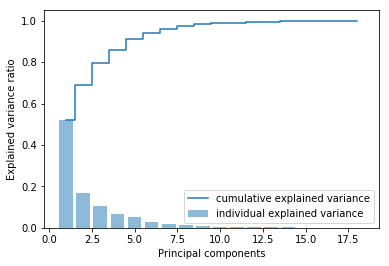

In [108]:
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [109]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_df, y, test_size=test_size, random_state=seed)

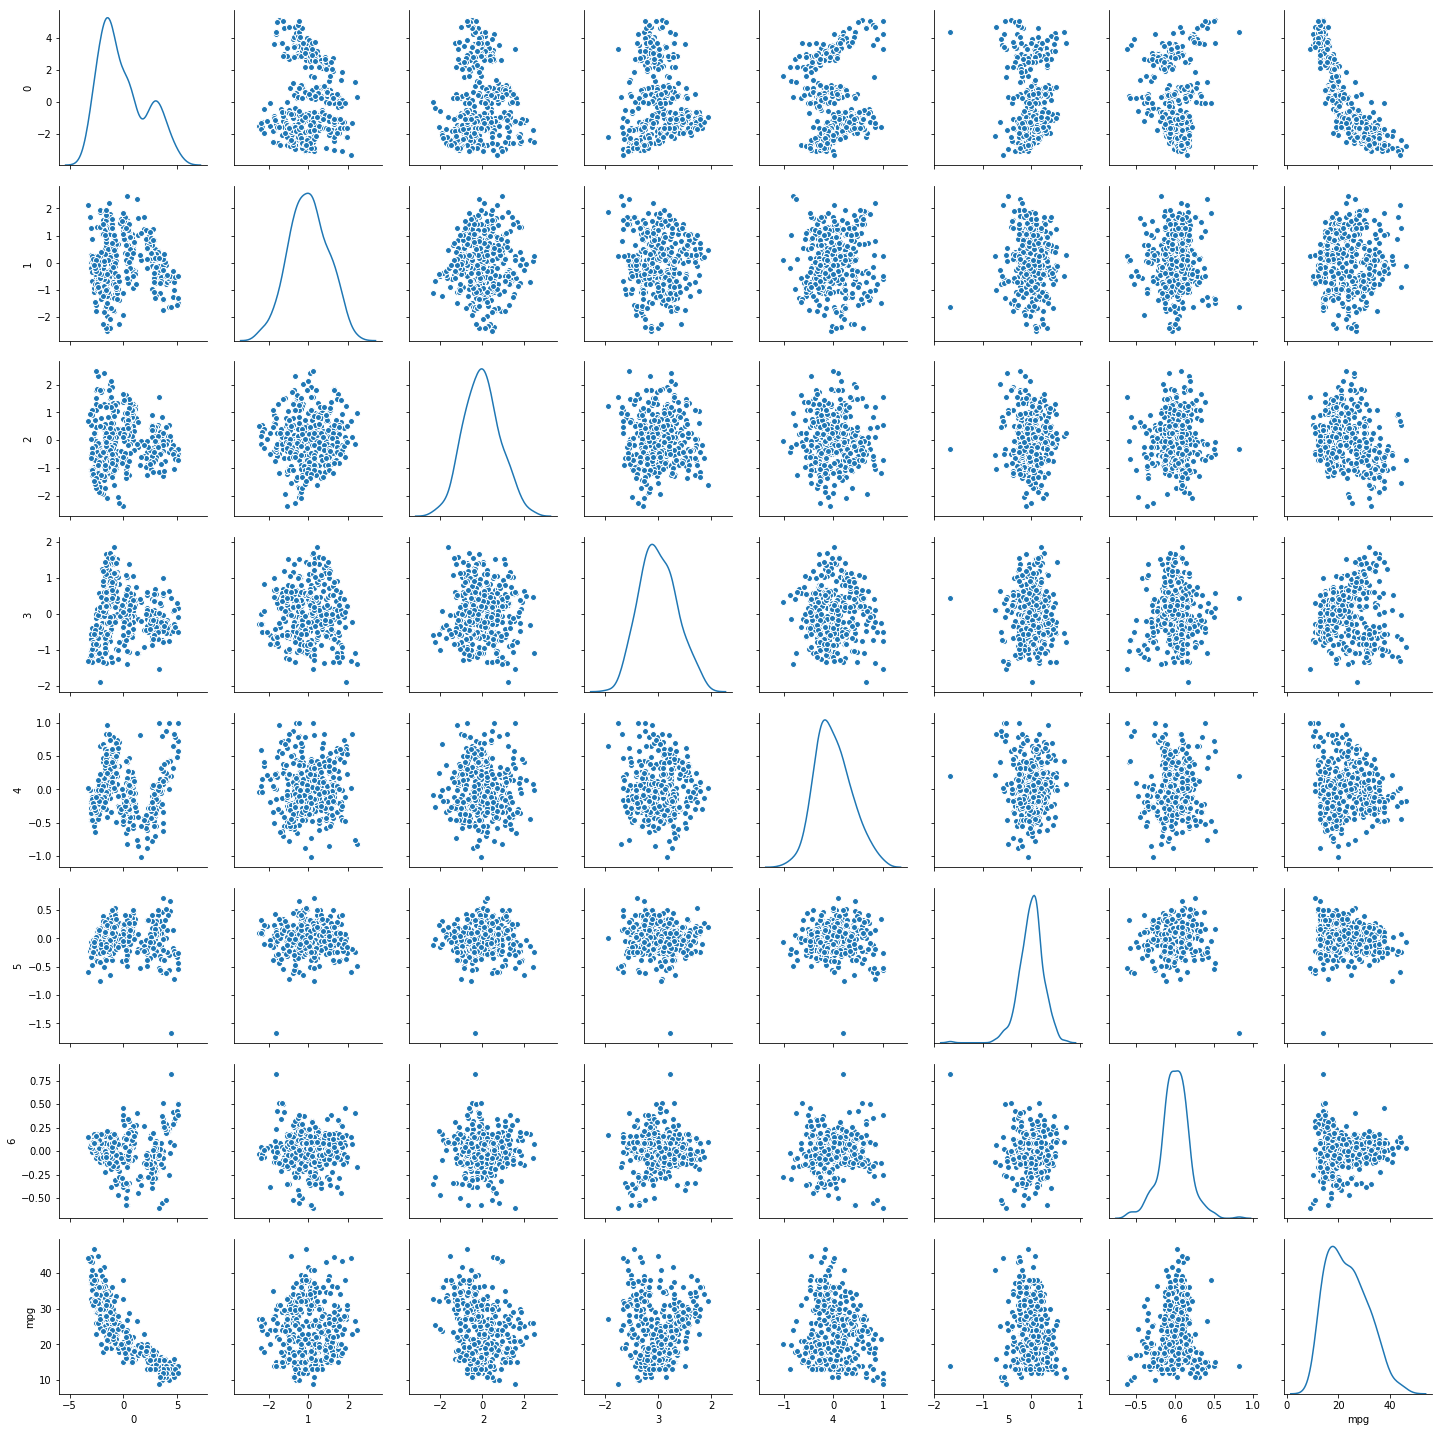

In [22]:
#Let us check it visually
Proj_data_mpg_df = Proj_data_df.join(y)

sns.pairplot(Proj_data_mpg_df, diag_kind='kde') 

In [110]:
# Let us build a linear regression model on the PCA dimensions 

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

regression_model.coef_

array([-0.05802171,  0.05263793, -0.02547684,  0.10902036])

In [111]:
regression_model.intercept_

0.9766168181901267

In [112]:
regression_model.score(X_test, y_test)

0.060340402691445916

In [120]:
# Step 4: Project data onto lesser dimensions

P_reduce = np.array(eigvectors_sorted[0:9])   # Using all principal components

Proj_data_2D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

In [121]:
X_std.shape, P_reduce.shape,Proj_data_2D.shape

((846, 18), (9, 18), (846, 9))

In [122]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_2D, y, test_size=test_size, random_state=seed)
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(result)

0.8700787401574803


C:\Users\Sahanaa_M\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sahanaa_M\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Step 4 : Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. (10 points)

In [125]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
svc_model = SVC(C= .01, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)
# check the accuracy on the training set
print('Training set accuracy',svc_model.score(X_train, y_train))
print('Test set accuracy',svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))


Training set accuracy 0.8547297297297297
Test set accuracy 0.8464566929133859
Confusion Matrix:
 [[ 51   8   2]
 [ 11 109   4]
 [  4  10  55]]


In [126]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
svc_model = SVC(C= .01, kernel='rbf', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)
# check the accuracy on the training set
print('Training set accuracy',svc_model.score(X_train, y_train))
print('Test set accuracy',svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))


Training set accuracy 0.5101351351351351
Test set accuracy 0.5
Confusion Matrix:
 [[  0   0   0]
 [ 66 127  61]
 [  0   0   0]]


In [127]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
svc_model = SVC(C= .05, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)
# check the accuracy on the training set
print('Training set accuracy',svc_model.score(X_train, y_train))
print('Test set accuracy',svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))


Training set accuracy 0.9037162162162162
Test set accuracy 0.8858267716535433
Confusion Matrix:
 [[ 56  10   2]
 [  6 113   3]
 [  4   4  56]]


In [128]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
svc_model = SVC(C= .05, kernel='rbf', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)
# check the accuracy on the training set
print('Training set accuracy',svc_model.score(X_train, y_train))
print('Test set accuracy',svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))


Training set accuracy 0.5101351351351351
Test set accuracy 0.5
Confusion Matrix:
 [[  0   0   0]
 [ 66 127  61]
 [  0   0   0]]


In [129]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
svc_model = SVC(C= .5, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)
# check the accuracy on the training set
print('Training set accuracy',svc_model.score(X_train, y_train))
print('Test set accuracy',svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))


Training set accuracy 0.918918918918919
Test set accuracy 0.8937007874015748
Confusion Matrix:
 [[ 58   8   2]
 [  6 114   4]
 [  2   5  55]]


In [131]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
svc_model = SVC(C= .5, kernel='rbf', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)
# check the accuracy on the training set
print('Training set accuracy',svc_model.score(X_train, y_train))
print('Test set accuracy',svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))


Training set accuracy 0.8868243243243243
Test set accuracy 0.7165354330708661
Confusion Matrix:
 [[ 34   0   1]
 [ 32 127  39]
 [  0   0  21]]


In [132]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
svc_model = SVC(C= 1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)
# check the accuracy on the training set
print('Training set accuracy',svc_model.score(X_train, y_train))
print('Test set accuracy',svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))


Training set accuracy 0.9206081081081081
Test set accuracy 0.8976377952755905
Confusion Matrix:
 [[ 59   9   2]
 [  5 114   4]
 [  2   4  55]]


In [133]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
svc_model = SVC(C= 1, kernel='rbf', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)
# check the accuracy on the training set
print('Training set accuracy',svc_model.score(X_train, y_train))
print('Test set accuracy',svc_model.score(X_test, y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))


Training set accuracy 0.9983108108108109
Test set accuracy 0.8858267716535433
Confusion Matrix:
 [[ 53   0   1]
 [ 13 125  13]
 [  0   2  47]]


In [ ]:
#Inference
#Out of the different combinations of C and kernel, when c=1 and kernel is rbf, for this dataset, it gives better results